In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import dill

In [2]:
data=pd.read_csv("Admission_Predict.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data = data.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'})

In [5]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


<Axes: >

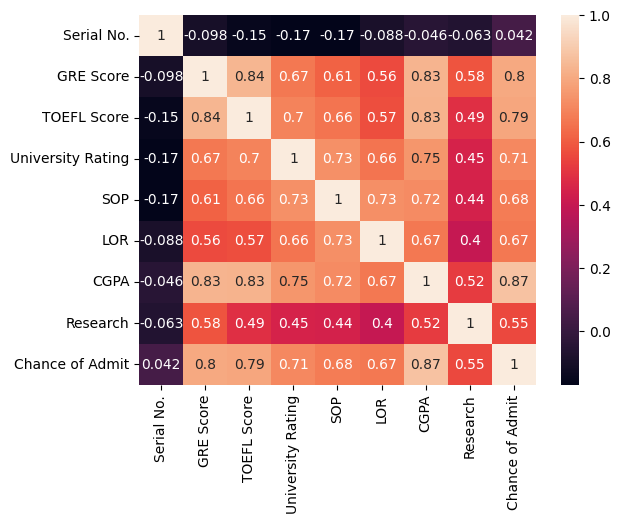

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Chance of Admit'), data['Chance of Admit'], test_size=0.2)

In [10]:
X_train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000
mean,195.134375,316.553125,107.390625,3.096875,3.44375,3.446875,8.591625,0.543750
std,116.470902,11.508086,6.119544,1.133692,0.98974,0.912465,0.591290,0.498862
min,1.000000,290.000000,92.000000,1.000000,1.00000,1.000000,6.800000,0.000000
25%,92.750000,308.000000,103.000000,2.000000,3.00000,3.000000,8.147500,0.000000
50%,190.500000,317.000000,107.000000,3.000000,3.50000,3.500000,8.560000,1.000000
75%,295.250000,325.000000,111.250000,4.000000,4.00000,4.000000,9.080000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.00000,5.000000,9.920000,1.000000


C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

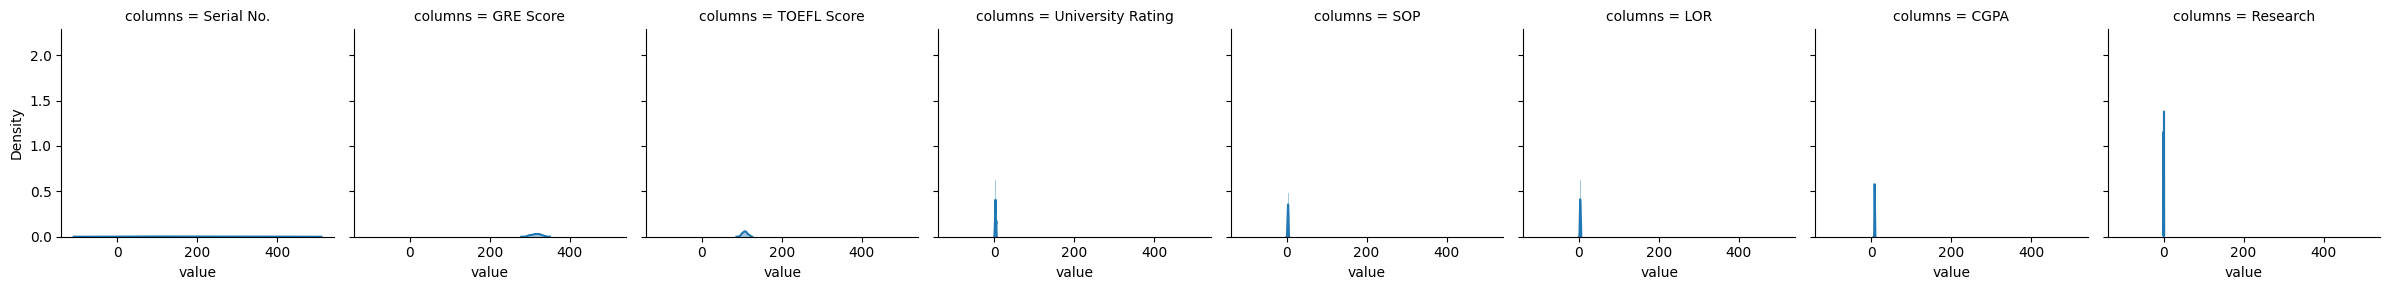

In [12]:
#The ranges of all the features are very distinct and should be scaled correctly before making any predictions
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

In [13]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

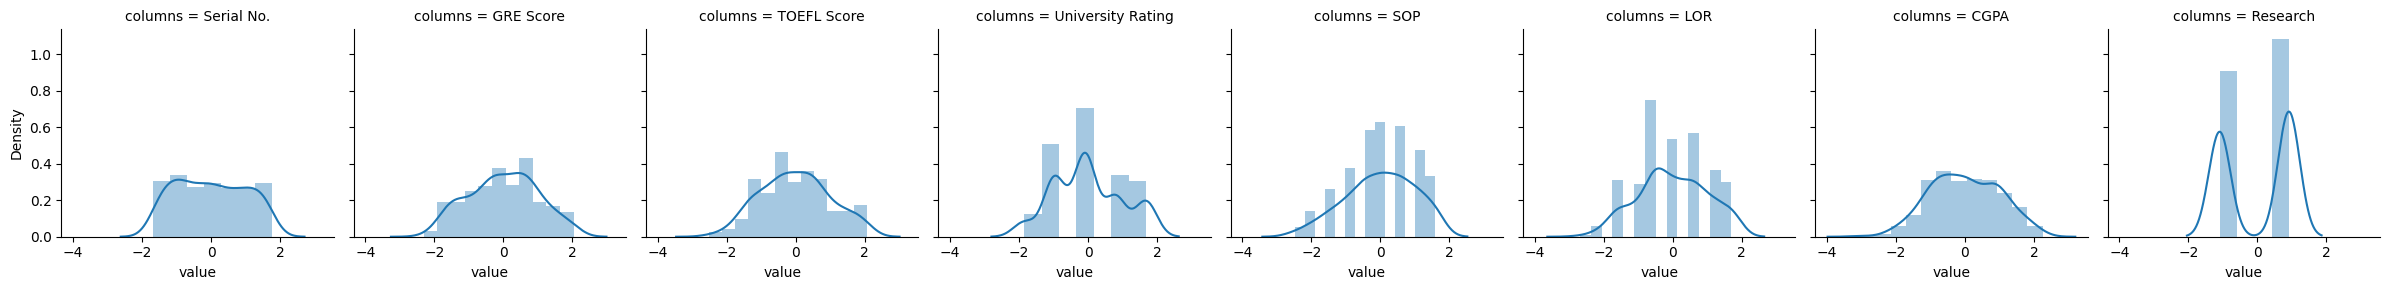

In [14]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

In [15]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,0.180701,0.013543,0.007335,0.000248,300,100,"{'max_depth': 300, 'n_estimators': 100}",0.818692,0.823225,0.816575,0.819497,0.002774
2,0.230214,0.004728,0.010958,0.000921,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.820502,0.818051,0.814405,0.817653,0.002505
3,0.247092,0.002276,0.010178,0.000046,None,100,"{'max_depth': None, 'n_estimators': 100}",0.816461,0.812929,0.821169,0.816853,0.003376
4,0.524321,0.019718,0.019811,0.001266,300,300,"{'max_depth': 300, 'n_estimators': 300}",0.825766,0.815393,0.809390,0.816849,0.006764
5,0.414516,0.004213,0.017113,0.001236,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.820223,0.812914,0.813885,0.815674,0.003241
6,0.464326,0.011684,0.016506,0.000319,400,250,"{'max_depth': 400, 'n_estimators': 250}",0.820638,0.811908,0.813744,0.815430,0.003758
7,0.677759,0.002642,0.025001,0.000422,None,300,"{'max_depth': None, 'n_estimators': 300}",0.819646,0.812686,0.813717,0.815350,0.003067
8,0.568412,0.007921,0.021713,0.001246,100,250,"{'max_depth': 100, 'n_estimators': 250}",0.820385,0.809071,0.816458,0.815305,0.004690
9,0.085450,0.001438,0.005536,0.001619,200,50,"{'max_depth': 200, 'n_estimators': 50}",0.820680,0.813860,0.811007,0.815182,0.004058


In [16]:
pipe = make_pipeline(scaler, gridsearch)

In [17]:
print('Original model: ' + str(gridsearch.predict(X=scaler.transform(data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1)))[0]))
print('Pipeline model: ' + str(pipe.predict(X=data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1))[0]))

Original model: 0.9272000000000007
Pipeline model: 0.9272000000000007


C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
with open('rf_v1.pkl', 'wb') as f:
    dill.dump(pipe, f)

In [19]:
with open('rf_v1.pkl', 'rb') as f:
    model = dill.load(f)
    print(model.predict(X=data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1))[0])

0.9272000000000007


C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
